In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# from pandas.core.common import SettingWithCopyWarning
# warnings.simplefilter(action="ignore", category=FutureWarning)
# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid", 
              palette="colorblind", color_codes=True, 
              rc={"figure.figsize": [12, 8]})

In [2]:
import pandas as pd 
import yfinance as yf
import talib

In [3]:
df = yf.download("IBM",start="2020-01-01",end="2020-12-31",progress=False,auto_adjust=True)

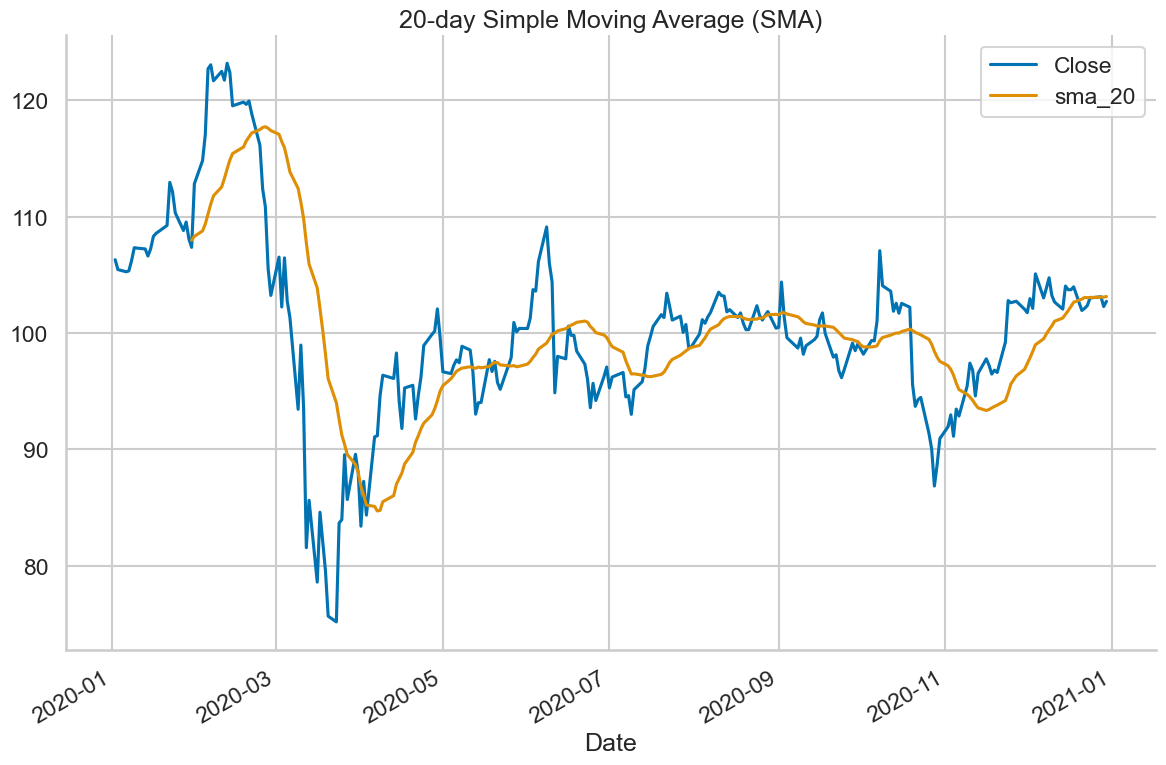

In [4]:
df["sma_20"] = talib.SMA(df["Close"], timeperiod=20)
(
    df[["Close", "sma_20"]]
    .plot(title="20-day Simple Moving Average (SMA)")
)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_1", dpi=200)

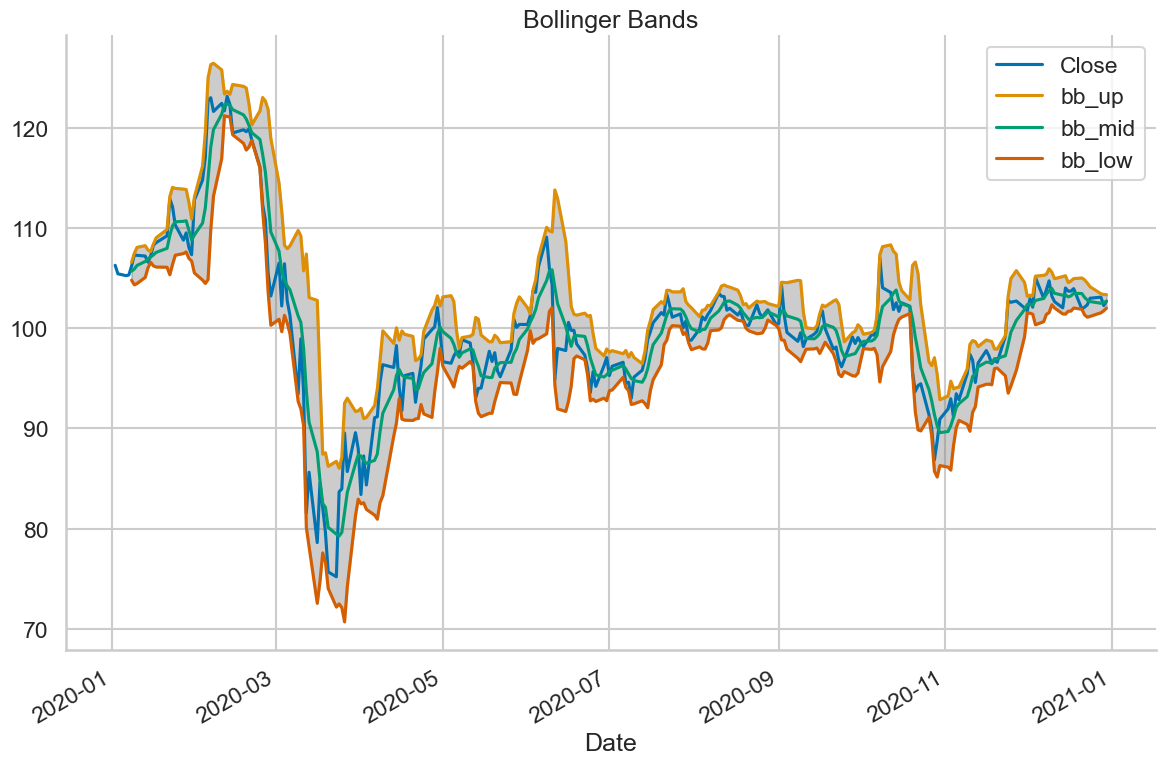

In [5]:
df["bb_up"], df["bb_mid"], df["bb_low"] = talib.BBANDS(df["Close"])

fig, ax = plt.subplots()

(
    df.loc[:, ["Close", "bb_up", "bb_mid", "bb_low"]]
    .plot(ax=ax, title="Bollinger Bands")
)

ax.fill_between(df.index, df["bb_low"], df["bb_up"], 
                color="gray", 
                alpha=.4)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_2", dpi=200)

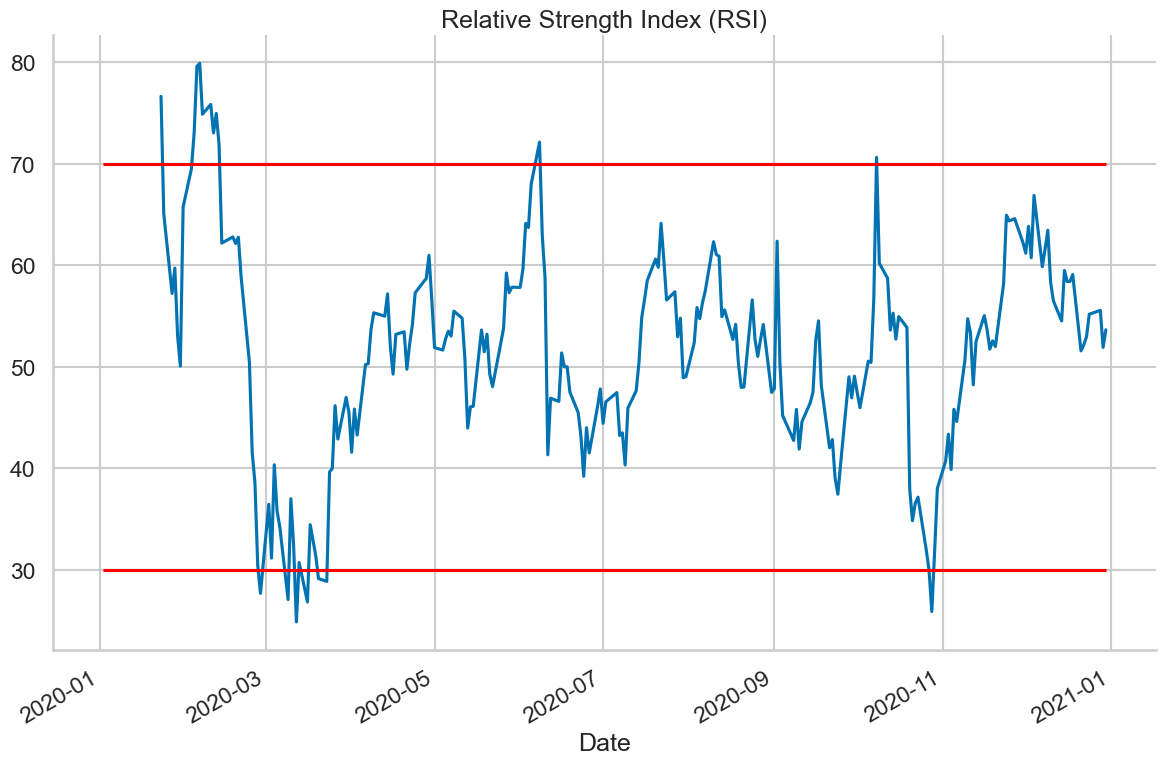

In [6]:
df["rsi"] = talib.RSI(df["Close"])

fig, ax = plt.subplots()
df["rsi"].plot(ax=ax, 
               title="Relative Strength Index (RSI)")
ax.hlines(y=30, 
          xmin=df.index.min(), 
          xmax=df.index.max(), 
          color="red")
ax.hlines(y=70, 
          xmin=df.index.min(), 
          xmax=df.index.max(), 
          color="red")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_3", dpi=200)

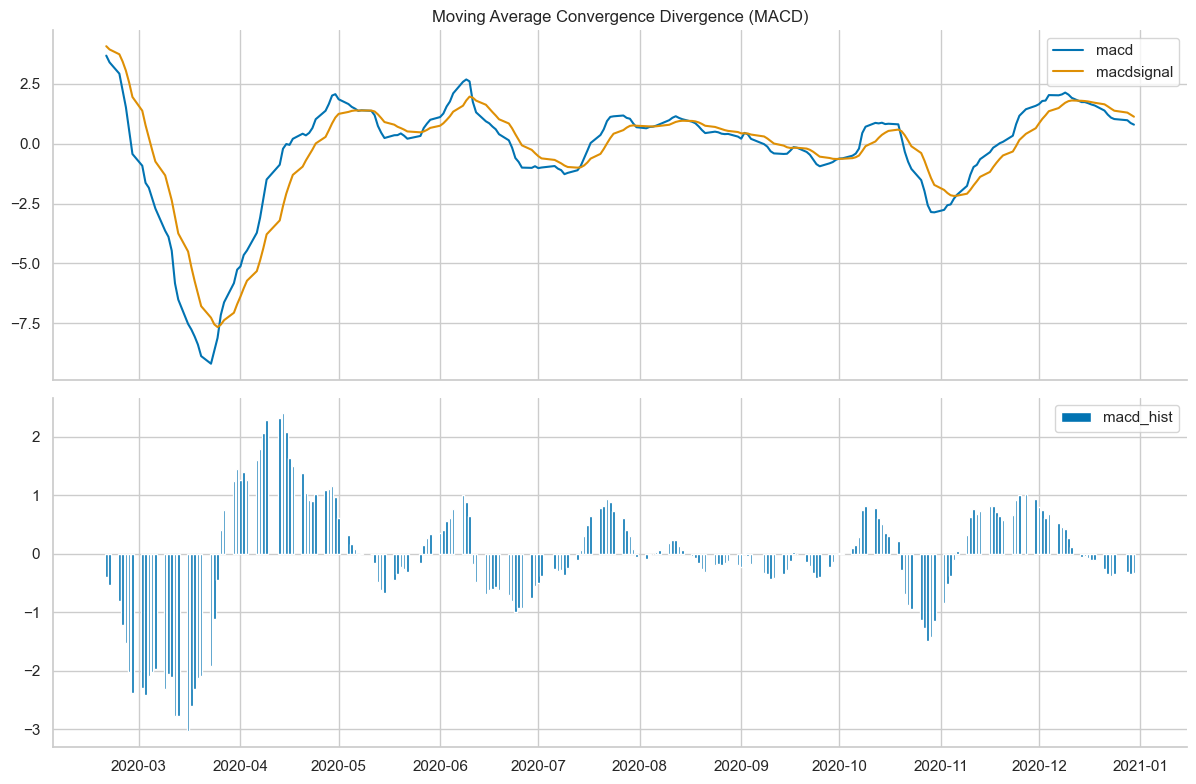

In [7]:
df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(
    df["Close"], fastperiod=12, slowperiod=26, signalperiod=9
)

with sns.plotting_context("notebook"):
    fig, ax = plt.subplots(2, 1, sharex=True)

    (
        df[["macd", "macdsignal"]].
        plot(ax=ax[0],
             title="Moving Average Convergence Divergence (MACD)")
    )
    ax[1].bar(df.index, df["macdhist"].values, label="macd_hist")
    ax[1].legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_5_4", dpi=200)


### There's more

In [8]:
from ta import add_all_ta_features


2. Discard the previously calculated indicators and keep only the required columns:

In [9]:
df = df[["Open", "High", "Low", "Close", "Volume"]].copy()

3. Calculate all the technical indicators available in the `ta` library:

In [10]:
df = add_all_ta_features(df, open="Open", high="High", 
                         low="Low", close="Close", 
                         volume="Volume")

/home/yair/bin/miniconda3/lib/python3.11/site-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


In [11]:
df.shape

(252, 91)

In [12]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base

In [19]:
import mplfinance as mpf


2. Download Bitcoin's hourly prices from the last 3 months:

In [20]:
df = yf.download("BTC-USD",  period="9mo",  interval="1h", progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-28 12:00:00+00:00,29259.804688,29414.482422,29224.962891,29249.066406,29249.066406,0
2023-04-28 13:00:00+00:00,29242.591797,29360.994141,28929.609375,29040.578125,29040.578125,608172032
2023-04-28 14:00:00+00:00,29049.507812,29302.421875,29023.611328,29079.082031,29079.082031,238897152
2023-04-28 15:00:00+00:00,29098.150391,29171.189453,28963.896484,29153.964844,29153.964844,0
2023-04-28 16:00:00+00:00,29157.177734,29304.808594,29120.779297,29288.707031,29288.707031,0
...,...,...,...,...,...,...
2024-01-28 08:00:00+00:00,42390.406250,42606.167969,42338.703125,42484.902344,42484.902344,162440192
2024-01-28 09:00:00+00:00,42488.378906,42681.664062,42442.917969,42590.296875,42590.296875,309897216
2024-01-28 10:00:00+00:00,42583.707031,42641.046875,42510.859375,42612.226562,42612.226562,138183680


3. Identify the "Three Line Strike" pattern:

In [21]:
df["3_line_strike"] = talib.CDL3LINESTRIKE(
    df["Open"], df["High"], df["Low"], df["Close"]
)

4. Locate and plot the bearish pattern:

In [26]:
df[df["3_line_strike"] == -100].head().round(2)

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2023-05-18 07:00:00+00:00,27218.53,27443.23,27205.69,27393.38,27393.38,0,-100
2023-05-22 13:00:00+00:00,26743.36,27045.73,26714.18,27016.17,27016.17,670828544,-100
2023-05-23 01:00:00+00:00,26821.62,27083.51,26816.18,27005.75,27005.75,571061248,-100
2023-06-04 06:00:00+00:00,27042.96,27142.12,27041.88,27133.54,27133.54,105805824,-100
2023-06-09 12:00:00+00:00,26617.03,26697.81,26617.03,26672.18,26672.18,0,-100


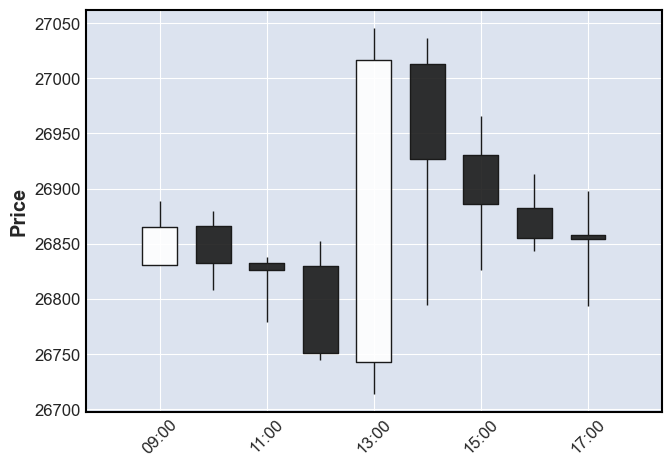

In [41]:
mpf.plot(df["2023-05-22 09:00:00+00:00":"2023-05-22 17:00:00+00:00"], 
         type="candle")

5. Locate and plot the bullish pattern:

In [28]:
df[df["3_line_strike"] == 100].head().round(2)

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2023-06-12 12:00:00+00:00,25991.80,25991.80,25912.51,25930.69,25930.69,41630720,100
2023-07-08 18:00:00+00:00,30264.95,30264.95,30202.94,30205.38,30205.38,0,100
2023-07-16 23:00:00+00:00,30338.71,30338.71,30171.79,30250.34,30250.34,264502784,100
2023-08-10 11:00:00+00:00,29519.91,29523.74,29462.47,29470.03,29470.03,0,100
2023-08-30 06:00:00+00:00,27464.55,27464.55,27379.30,27386.76,27386.76,99358720,100


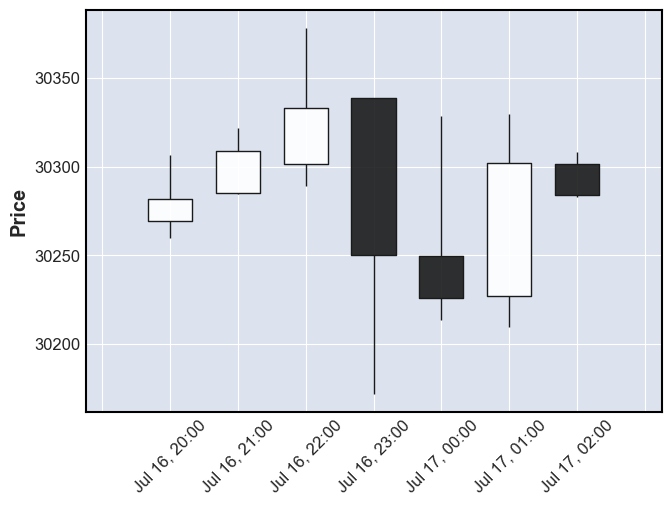

In [51]:
mpf.plot(df["2023-07-16 20:00:00+00:00":"2023-07-17 02:00:00+00:00"], 
         type="candle")

### candle names

In [30]:
candle_names = talib.get_function_groups()["Pattern Recognition"]

In [31]:
for candle in candle_names:
    df[candle] = getattr(talib, candle)(df["Open"], df["High"], 
                                        df["Low"], df["Close"])

In [32]:
with pd.option_context("display.max_rows", len(candle_names)):
    display(df[candle_names].describe().transpose().round(2))

,count,mean,std,min,25%,50%,75%,max
CDL2CROWS,6600.0,-0.03,1.74,-100.0,0.0,0.0,0.0,0.0
CDL3BLACKCROWS,6600.0,-0.05,2.13,-100.0,0.0,0.0,0.0,0.0
CDL3INSIDE,6600.0,-0.09,11.28,-100.0,0.0,0.0,0.0,100.0
CDL3LINESTRIKE,6600.0,-0.03,6.51,-100.0,0.0,0.0,0.0,100.0
CDL3OUTSIDE,6600.0,-0.27,23.87,-100.0,0.0,0.0,0.0,100.0
CDL3STARSINSOUTH,6600.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDL3WHITESOLDIERS,6600.0,0.23,4.76,0.0,0.0,0.0,0.0,100.0
CDLABANDONEDBABY,6600.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDLADVANCEBLOCK,6600.0,-0.97,9.80,-100.0,0.0,0.0,0.0,0.0
CDLBELTHOLD,6600.0,0.39,43.10,-100.0,0.0,0.0,0.0,100.0


4. Locate and plot the "Evening Star" pattern:

In [34]:
df[df["CDLEVENINGSTAR"]  == -100].head()

,Open,High,Low,Close,Adj Close,Volume,3_line_strike,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-10 21:00:00+00:00,27875.826172,27875.826172,27440.468750,27521.869141,27521.869141,652687360,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
2023-06-01 00:00:00+00:00,27218.412109,27346.105469,27048.951172,27062.232422,27062.232422,577002496,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-07-03 04:00:00+00:00,30759.115234,30789.113281,30683.988281,30683.988281,30683.988281,152043520,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-07-08 18:00:00+00:00,30264.947266,30264.947266,30202.941406,30205.380859,30205.380859,0,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-08-02 12:00:00+00:00,29547.423828,29581.294922,29461.578125,29461.578125,29461.578125,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


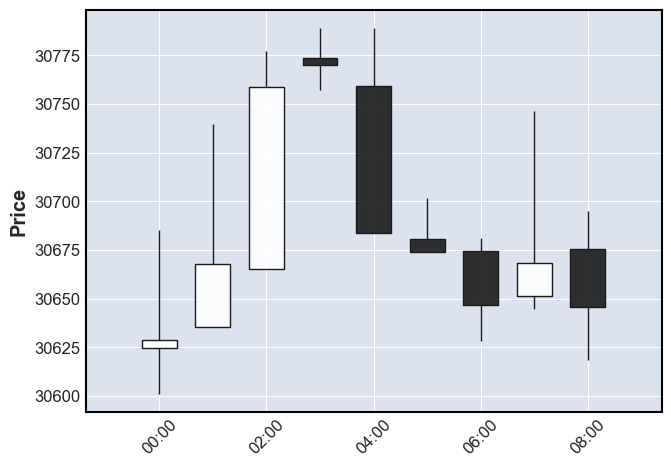

In [52]:
mpf.plot(df["2023-07-03 00:00:00+00:00":"2023-07-03 08:00:00+00:00"], type="candle")